[View in Colaboratory](https://colab.research.google.com/github/gisazae/cryptographyPython/blob/master/StegoLSB.ipynb)

In [3]:
import numpy as np
import cv2
from skimage.io import imread
from skimage.io import imsave
from matplotlib import pyplot as plt

# <font color='red'>Imagen Original</font> 

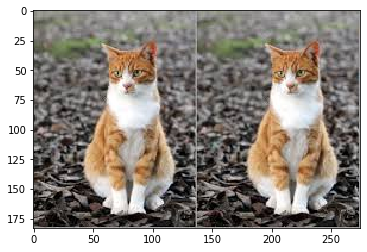

'00010001'

(183, 275, 3) <class 'numpy.ndarray'>


In [6]:
#lectura de la imagen
img=imread('img2.jpeg')
plt.imshow(img)
plt.show()
print(img.shape, type(img))
bin(255)
x = 17
"{0:08b}".format(x)

# <font color='red'>Imagenes de cada plano de bits</font> 

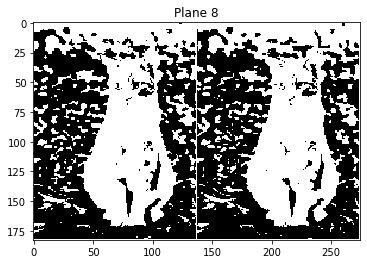

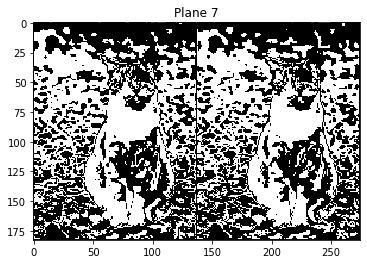

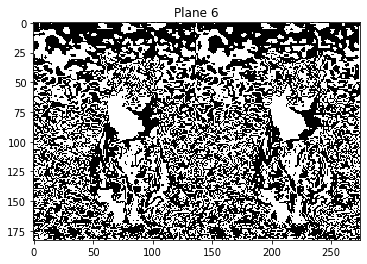

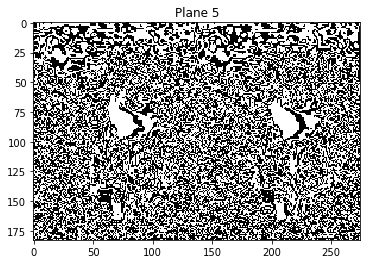

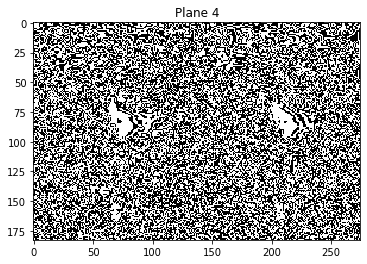

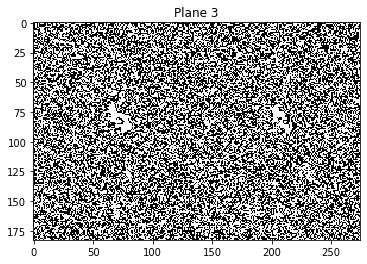

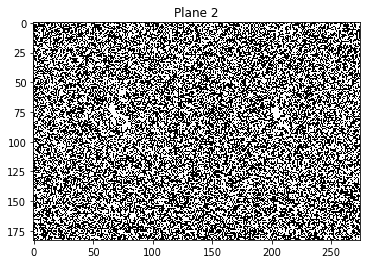

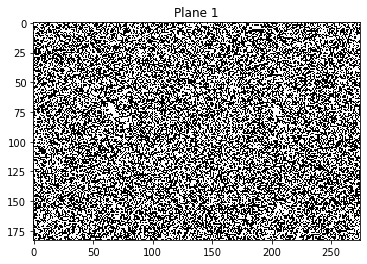

In [8]:
#funcion que pasa de decimal a binario
def binarizar(decimal):
    binario = ''
    while decimal // 2 != 0:
        binario = str(decimal % 2) + binario
        decimal = decimal // 2
    return str(decimal) + binario
# se elige el plano y se coloca 0 o 255 para resaltar el plano
for bit in range(8):
    img=imread('img2.jpeg')
    img2=img
    height, width, channels = img.shape
    for x in range(0,height):
        for y in range(0,width):
            z=binarizar(img[x,y,0])
            #print(int(z))
            while len(z)<8:
                z='0'+z
            if z[bit]=='1':
                img2[x,y,0] = 255
                img2[x,y,1] = 255
                img2[x,y,2] = 255
            else:
                img2[x,y,0] = 0
                img2[x,y,1] = 0
                img2[x,y,2] = 0
    
    plt.title('Plane '+ str(8-bit))
    plt.imshow(img2)
    plt.show()  

# <font color='red'>Mensaje a ocultar</font> 

In [9]:
x=input('ingrese el mensaje a ocultar: ');
men=''
for i in range(len(x)):
    z=binarizar(ord(x[i]))
    while len(z)<8:
        z='0'+z
    men=z+men
print('el tamaño del mensaje es: ',len(men), 'bits')
print(men)

ingrese el mensaje a ocultar: Stego test in cover image
el tamaño del mensaje es:  200 bits
01100101011001110110000101101101011010010010000001110010011001010111011001101111011000110010000001101110011010010010000001110100011100110110010101110100001000000110111101100111011001010111010001010011


# <font color='red'>Codificacion del bit menos significativo</font> 

In [10]:
img=imread('img2.jpeg')
img2=img
pos=7
cont=0
ban=0
height, width, channels = img.shape
for x in range(0,height):
    if ban==1:
        break
    for y in range(0,width):
        z=binarizar(img[x,y,0])
        while len(z)<8:
            z='0'+z
        z=z[0:7]+men[cont]    
        img2[x,y,0] = int(str(z), 2)
        cont=cont+1
        if cont==len(men):
            ban=1
            break
imsave("Stego.bmp", img2)

In [11]:
img=imread('img2.jpeg')
img2=imread('Stego.bmp')

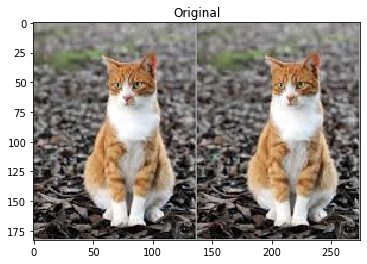

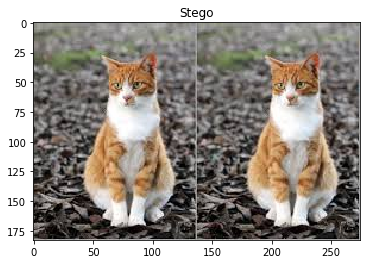

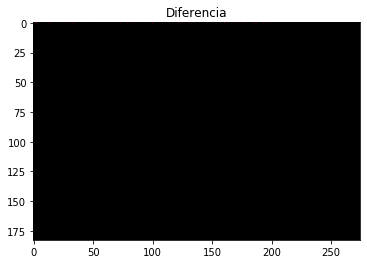

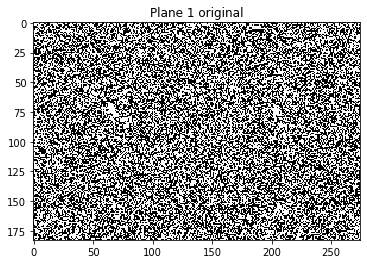

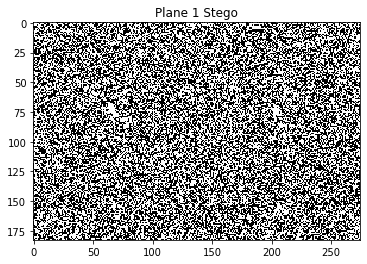

In [12]:
plt.title('Original')
plt.imshow(img)
plt.show()

plt.title('Stego')
plt.imshow(img2)
plt.show()

plt.title('Diferencia')
img3= img-img2
#plt.imshow(img3[:5,:160])
plt.imshow(img3)
plt.show()
img4=img

for x in range(0,height):
    for y in range(0,width):
        z=binarizar(img[x,y,0])
        while len(z)<8:
            z='0'+z
        if z[7]=='1':
            img4[x,y,0] = 255
            img4[x,y,1] = 255
            img4[x,y,2] = 255
        else:
            img4[x,y,0] = 0
            img4[x,y,1] = 0
            img4[x,y,2] = 0
    
plt.title('Plane 1 original')
plt.imshow(img4)
plt.show()  

img5=img2
for x in range(0,height):
    for y in range(0,width):
        z=binarizar(img2[x,y,0])
        while len(z)<8:
            z='0'+z
        if z[7]=='1':
            img5[x,y,0] = 255
            img5[x,y,1] = 255
            img5[x,y,2] = 255
        else:
            img5[x,y,0] = 0
            img5[x,y,1] = 0
            img5[x,y,2] = 0
    
plt.title('Plane 1 Stego')
plt.imshow(img5)
plt.show() 

# <font color='red'>decodificacion del bit menos significativo</font> 

In [13]:
img=imread('Stego.bmp')
height, width, channels = img.shape
cont=0
ban=0
men2=''
for x in range(0,height):
    if ban==1:
        break
    for y in range(0,width):
        z=binarizar(img[x,y,0])
        while len(z)<8:
            z='0'+z
        men2=men2+z[7]
        cont=cont+1
        if cont==len(men):
            ban=1
            break

In [14]:
i=0
res=''
while i<len(men2):
    part=men2[i:i+8]
    res=(chr(int(str(part), 2)))+res
    i=i+8 
print(res)

Stego test in cover image


In [15]:
observed, bin_edges = np.histogram(img, bins=list(range(257))) 

In [16]:
print(observed,bin_edges)

[1428  320  257  280  355  272  330  296  255  277  291  288  310  273
  297  342  302  339  319  305  328  327  378  333  365  375  424  387
  404  376  393  393  378  414  421  398  430  394  403  403  415  433
  427  430  432  441  420  462  473  453  465  472  463  496  480  476
  513  507  510  553  530  537  564  552  573  596  577  601  627  635
  645  708  698  667  664  730  715  705  748  813  772  776  804  804
  827  830  804  825  880  887  854  865  895  934  977 1007  902  948
  931  992  932  970  965 1086 1008  927 1038  989  995 1058 1040 1063
 1084 1070 1044 1122 1101 1118 1123 1166 1081 1091 1140 1103 1133 1163
 1133 1147 1127 1146 1166 1140 1136 1231 1113 1177 1146 1165 1112 1109
 1097 1075 1110 1089 1120 1090 1078 1085 1075 1092 1030 1008  927  936
  970  873  881  878  844  824  794  734  689  751  726  669  651  603
  572  580  546  539  469  458  435  469  438  433  406  419  440  402
  420  384  401  396  373  359  358  322  292  313  318  341  297  289
  313 